<a href="https://colab.research.google.com/github/Nischay-verma/Almabetter-Appolied_statistics_mid/blob/main/Applied_Statistics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Purchase Behavior Analysis using Descriptive Statistics

##Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





##Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**

In [2]:
# import all necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import scipy.stats as stat
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [3]:
# load the dataset from github
df = pd.read_csv('https://raw.githubusercontent.com/Nischay-verma/Almabetter-Appolied_statistics_mid/main/Superstore%20Marketing%20Data%20-%20Sheet1.csv')

In [4]:
df.head() # first 5 rows

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0


In [5]:
df.shape  # rows and column in dataset

(2240, 22)

In [6]:
df.tail() # Last 5 rows

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
2235,10142,1976,PhD,Divorced,66476.0,0,1,########,99,372,...,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,########,99,185,...,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,149,165,63,1,5,4,10,3,0,0
2239,4070,1969,PhD,Married,94871.0,0,2,########,99,169,...,188,0,144,1,8,5,4,7,1,0


In [7]:
df.info() # information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [8]:
df.isnull().sum() # checking null values

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [9]:
df.duplicated().sum() # checking duplicate values

0

In [10]:
df.columns # columns name

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')

In [11]:
categorical_column = ['Marital_Status', 'Education']
for i in categorical_column:
    print(i, ':', df[i].unique())

Marital_Status : ['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']
Education : ['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']


In [12]:
df['Dt_Customer'] = df['Dt_Customer'].replace('########', pd.NaT) # replace ### with Nan
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])  # convert object to datetime

In [13]:
df['Dt_Customer'].head(10) # first 10 rows of Dt_Customer

0   2014-06-16
1   2014-06-15
2   2014-05-13
3          NaT
4          NaT
5   2014-03-17
6   2014-01-29
7   2014-01-18
8          NaT
9          NaT
Name: Dt_Customer, dtype: datetime64[ns]

In [14]:
# fill missing value in dt_customer

df['Dt_Customer'].fillna(df['Dt_Customer'].mode()[0], inplace=True)
df['Dt_Customer']

0      2014-06-16
1      2014-06-15
2      2014-05-13
3      2012-08-31
4      2012-08-31
          ...    
2235   2012-08-31
2236   2013-01-22
2237   2012-08-31
2238   2012-11-29
2239   2012-08-31
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

In [15]:
# total amount spent by summing up spending on different product categories

df['Total_spent'] = df['MntFishProducts'] + df['MntMeatProducts'] + df['MntFruits'] + df['MntSweetProducts'] + df['MntWines'] + df['MntGoldProds']
print(df['Total_spent'])

0       1190
1        577
2        251
3         11
4         91
        ... 
2235     689
2236      55
2237     309
2238    1383
2239    1078
Name: Total_spent, Length: 2240, dtype: int64


In [16]:
# the age of customer at the time of join


df['Age_at_join'] = df['Dt_Customer'].dt.year - df['Year_Birth']
df['Age_at_join'].head()


0    44
1    53
2    56
3    45
4    23
Name: Age_at_join, dtype: int64

In [17]:
# income is null
df[df['Income'].isnull()]


,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Total_spent,Age_at_join
134,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,53,12,7,2,8,9,0,0,603,55
262,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,1,1,1,0,2,7,0,0,19,30
394,3769,1972,PhD,Together,NaN,1,0,2012-08-31,17,25,...,3,1,1,0,3,7,0,0,42,40
449,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,362,0,27,0,0,1,0,0,637,27
525,8268,1961,PhD,Married,NaN,0,1,2012-08-31,23,352,...,15,3,6,1,7,6,0,0,404,51
590,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,17,3,3,0,3,8,0,0,109,39
899,10475,1970,Master,Together,NaN,0,1,2012-08-31,39,187,...,14,2,4,2,6,5,0,0,317,42
997,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,1,1,1,0,2,7,0,0,18,57
1096,4345,1964,2n Cycle,Single,NaN,1,1,2012-08-31,49,5,...,4,1,1,0,2,7,0,0,21,48
1185,7187,1969,Master,Together,NaN,1,1,2013-05-18,52,375,...,96,7,4,10,4,3,0,0,721,44


<Axes: xlabel='Income'>

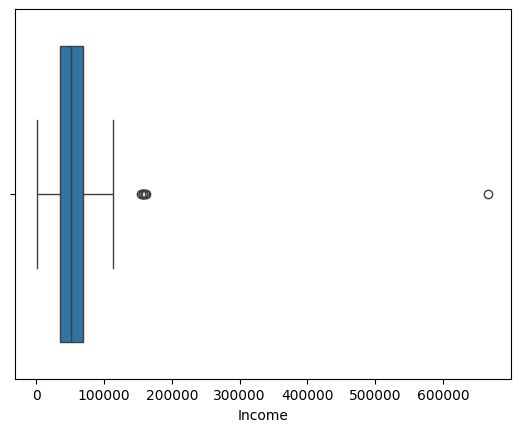

In [18]:
# outliers in income
sns.boxplot(x=df['Income'])


<Axes: xlabel='Income', ylabel='Density'>

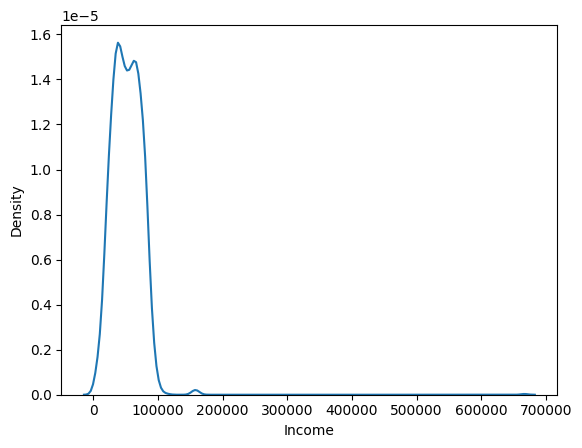

In [19]:
sns.kdeplot(df['Income'])

In [20]:
# skewness of df['Income]

print('Skewness of Income:', df['Income'].skew())


Skewness of Income: 6.763487372811116


In [21]:
# Outiliers detection with iqr
def outlier_detection(df, column):
  col = df[column]
  Q1 = col.quantile(0.25)
  Q3 = col.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outlier = (col < lower_bound) | (col > upper_bound)
  return df[outlier]



In [22]:
# outliers in Income column
outlier_detection(df, 'Income').head(10)

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Total_spent,Age_at_join
325,4931,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,...,1,0,0,28,0,1,0,0,1730,36
497,1501,1982,PhD,Married,160803.0,0,0,2012-08-31,21,55,...,4,15,0,28,1,0,0,0,1717,30
527,9432,1977,Graduation,Together,666666.0,1,0,2012-08-31,23,9,...,12,4,3,1,3,6,0,0,62,35
731,1503,1976,PhD,Together,162397.0,1,1,2012-08-31,31,85,...,2,0,0,0,1,1,0,0,107,36
853,5336,1971,Master,Together,157733.0,1,0,2012-08-31,37,39,...,8,0,1,0,1,1,0,0,59,41
1826,5555,1975,Graduation,Divorced,153924.0,0,0,2012-08-31,81,1,...,1,0,0,0,0,0,0,0,6,37
1925,11181,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,...,1,0,0,0,0,0,0,0,8,64
2204,8475,1973,PhD,Married,157243.0,0,1,2012-08-31,98,20,...,1,15,0,22,0,0,0,0,1608,39


In [23]:

# Outlier treatment
df['Income'] = np.where(df['Income'] > 150000, df['Income'].median(), df['Income'])
df[df['Income'].isnull()]

# skewness after outlier treatment
print('Skewness of Income after outlier treatment:', df['Income'].skew())

# fill null values in income with median
df['Income'].fillna(df['Income'].median(), inplace=True)
print('Total Null values in Income Column:', df['Income'].isnull().sum())


Skewness of Income after outlier treatment: 0.013146537498986761
Total Null values in Income Column: 0


In [24]:
# summary stats of df['Income']

df['Income'].describe()


count      2240.000000
mean      51629.990625
std       20564.847403
min        1730.000000
25%       35538.750000
50%       51377.250000
75%       68098.250000
max      113734.000000
Name: Income, dtype: float64

**Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**

*EDUCATION*


In [25]:
df['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [26]:
df['Education'].describe()

count           2240
unique             5
top       Graduation
freq            1127
Name: Education, dtype: object

<Axes: xlabel='Education'>

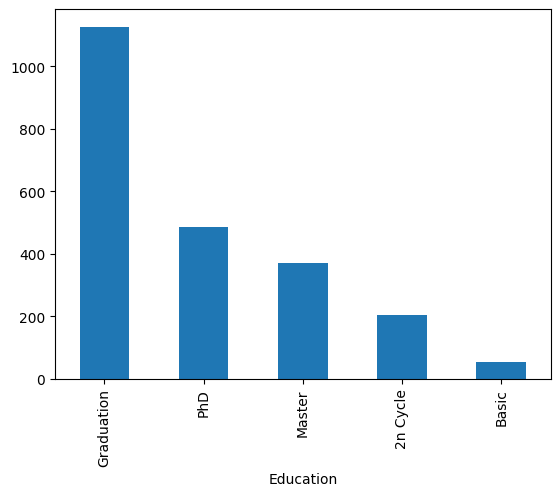

In [27]:
# Distribution of Education Levels through Bar chart
df['Education'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

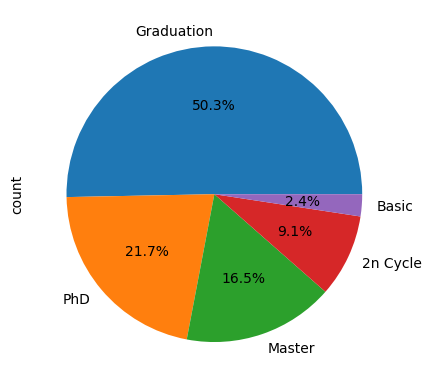

In [28]:
# % of Distribution of Education Levels through Pie chart
df['Education'].value_counts().plot(kind='pie', autopct='%1.1f%%')

*AGE*

In [29]:
# stats for Age_at_join
df['Age_at_join'].describe()

count    2240.000000
mean       43.809375
std        12.028877
min        16.000000
25%        35.000000
50%        43.000000
75%        54.000000
max       121.000000
Name: Age_at_join, dtype: float64

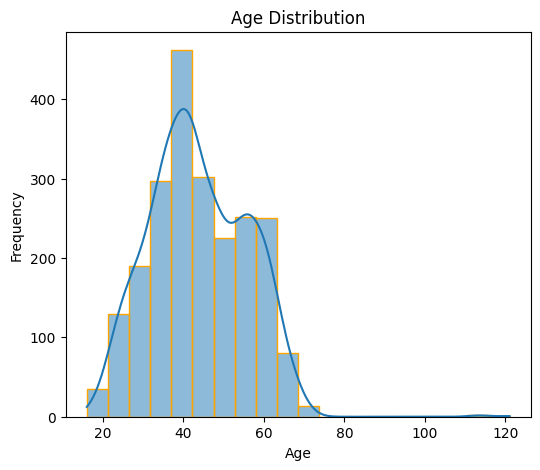

In [30]:
# Age distributions visuals
plt.figure(figsize=(6, 5))
sns.histplot(df['Age_at_join'],edgecolor='orange', bins = 20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

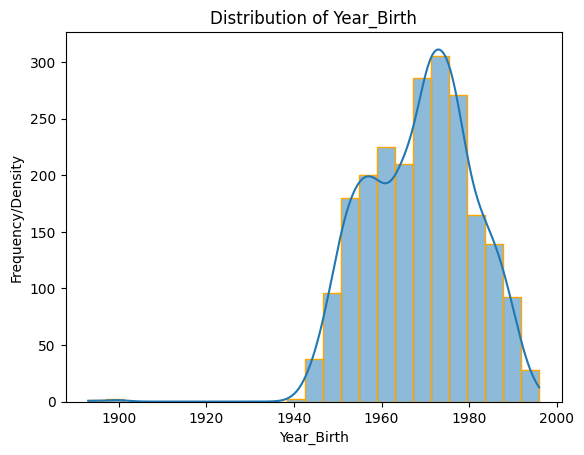

In [31]:
sns.histplot(df['Year_Birth'], bins=25, kde=True, edgecolor='orange')
plt.title('Distribution of Year_Birth')
plt.xlabel('Year_Birth')
plt.ylabel('Frequency/Density')
plt.show()

*MARITAL STATUS*

In [32]:
df['Marital_Status'].value_counts() # counts of maital status

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64

In [33]:
df['Marital_Status'].describe() # stats of marital status

count        2240
unique          8
top       Married
freq          864
Name: Marital_Status, dtype: object

Text(0, 0.5, 'Count')

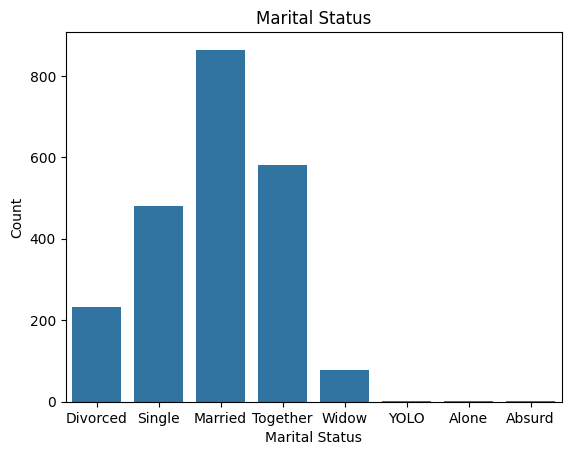

In [34]:
# visuals for marital status
sns.countplot(x='Marital_Status', data=df)
plt.title('Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')




**Deliverables**:

- **Cleaned and Preprocessed Dataset**:

  Provide a detailed report on the steps taken to handle missing values, including imputation methods used if applicable.
  Document the process of ensuring consistent data types for each variable, addressing any inconsistencies.

- **Summary of Basic Statistics**:

  Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.
  Include a concise table or summary showcasing these measures for easy reference.

# **Cleaned and Preprocessed Dataset:**

***Handle Missing Value***





*   Missing va;ues were found in 'Income' column in the superstore dataset.
*  To handle the missing values in 'Income' column we use median to fill the  missing values in the dataset.



***Handling Date and Time Data:***

*   Using 'pd.to_datetime()' to convert date of registration which is shown in 'Dt_customer' into datetime objects.
*   To handle the invalid format ##### we use pd.NaT to convert into Nan values and then replace it with mode




***Total Spending***

*   create a new column 'Total Spent' by summinng up spending on different product.




***Age at the time of joining***

*  'Age_at_join' was created by calculating the age of customers based on their enrollment date and birth year


# **Summary of Basic stats**



*   here is the table representing the values of mean, median, mode, variance and standard deviation for columns 'Income', 'year_birth'.





In [56]:
col = ['Income', 'Year_Birth']
table = pd.DataFrame({
    'Variable': col,
    'Mean': df[col].mean(),
    'Median': df[col].median(),
    'Variance': df[col].var(),
    'Standard Deviation': df[col].std()

})
table

,Variable,Mean,Median,Variance,Standard Deviation
Income,Income,51629.990625,51377.25,4.229129e+08,20564.847403
Year_Birth,Year_Birth,1968.805804,1970.00,1.436179e+02,11.984069


##Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


In [39]:
# list with all numerical columns
numerical_columns = []
for column in df:
  if df[column].dtype in ['int64', 'float64']:
    numerical_columns.append(column)

numerical_columns

['Id',
 'Year_Birth',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Response',
 'Complain',
 'Total_spent',
 'Age_at_join']

In [40]:
df[numerical_columns].describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Total_spent,Age_at_join
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,51629.990625,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375,605.798214,43.809375
std,3246.662198,11.984069,20564.847403,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391,602.249288,12.028877
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,16.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,68.750000,35.000000
50%,5458.500000,1970.000000,51377.250000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,396.000000,43.000000
75%,8427.750000,1977.000000,68098.250000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,1045.500000,54.000000
max,11191.000000,1996.000000,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,2525.000000,121.000000


In [68]:
# outliers detection in numerical_columns
def detect_outliers_iqr(df, numerical_columns):
    outliers_dict = {}

    for column_name in numerical_columns:
        # Select the column of interest
        data_column = df[column_name]
        Q1 = data_column.quantile(0.25)
        Q3 = data_column.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = df[(data_column < lower_bound) | (data_column > upper_bound)]

        if not outliers.empty:
            outliers_dict[column_name] = outliers[column_name].tolist()

    return outliers_dict

# Call the function with the DataFrame and numerical columns
outliers_dict = detect_outliers_iqr(df, numerical_columns)

# Print column names and outliers present in the dataset
for column_name, outliers in outliers_dict.items():
    print(f"{column_name} and  its outliers = {outliers}")

Year_Birth and  its outliers = [1893, 1899, 1900]
MntWines and  its outliers = [1285, 1248, 1285, 1296, 1462, 1478, 1478, 1302, 1239, 1349, 1308, 1230, 1332, 1253, 1394, 1276, 1288, 1493, 1311, 1486, 1492, 1492, 1259, 1241, 1245, 1459, 1379, 1285, 1298, 1315, 1396, 1324, 1449, 1252, 1279]
MntFruits and  its outliers = [104, 130, 82, 174, 169, 107, 105, 105, 96, 86, 193, 83, 148, 83, 103, 142, 97, 117, 134, 153, 148, 83, 142, 106, 88, 88, 153, 133, 99, 129, 129, 93, 107, 86, 185, 162, 168, 98, 129, 172, 140, 194, 91, 183, 134, 151, 197, 185, 178, 189, 102, 155, 115, 98, 98, 90, 83, 83, 114, 99, 93, 199, 199, 154, 183, 123, 108, 133, 137, 137, 91, 151, 129, 120, 120, 108, 108, 107, 84, 142, 129, 112, 183, 129, 178, 129, 151, 160, 114, 159, 111, 147, 143, 161, 144, 112, 112, 181, 133, 89, 97, 102, 105, 114, 114, 142, 155, 137, 107, 107, 147, 161, 168, 162, 115, 115, 84, 84, 132, 137, 117, 138, 108, 123, 184, 97, 86, 122, 114, 105, 111, 120, 194, 194, 91, 93, 93, 86, 106, 162, 193, 115, 84

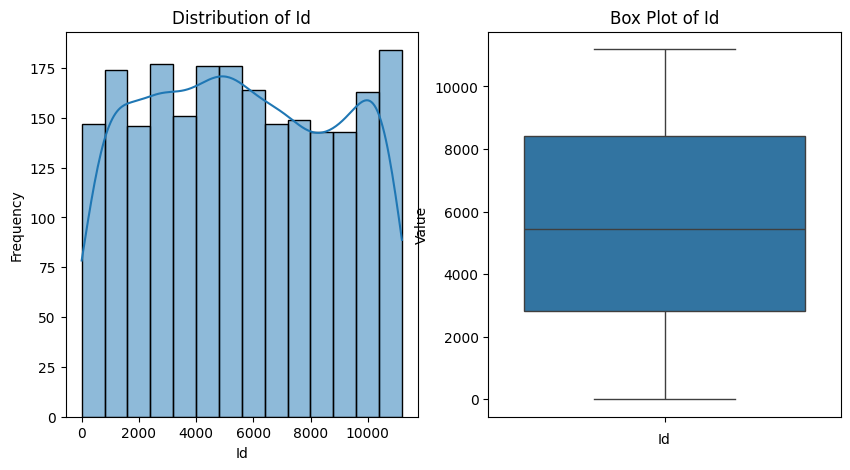

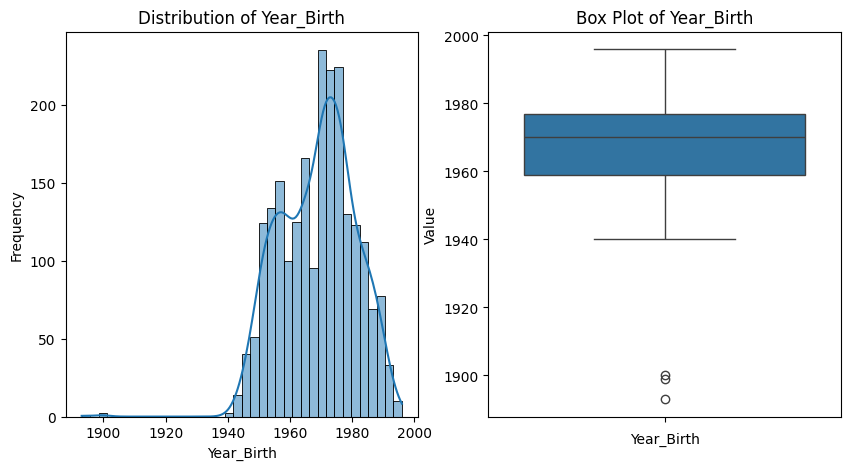

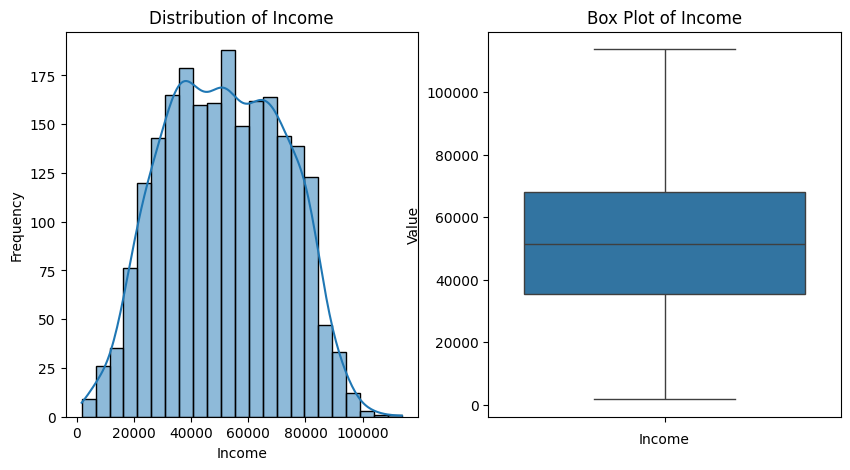

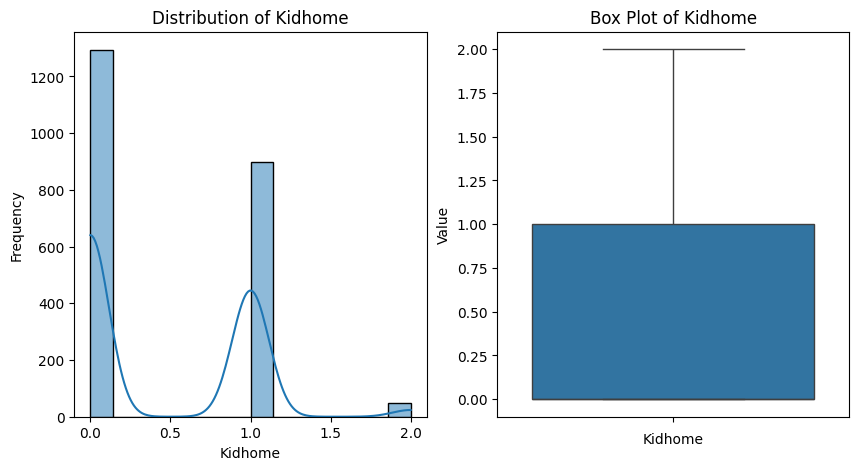

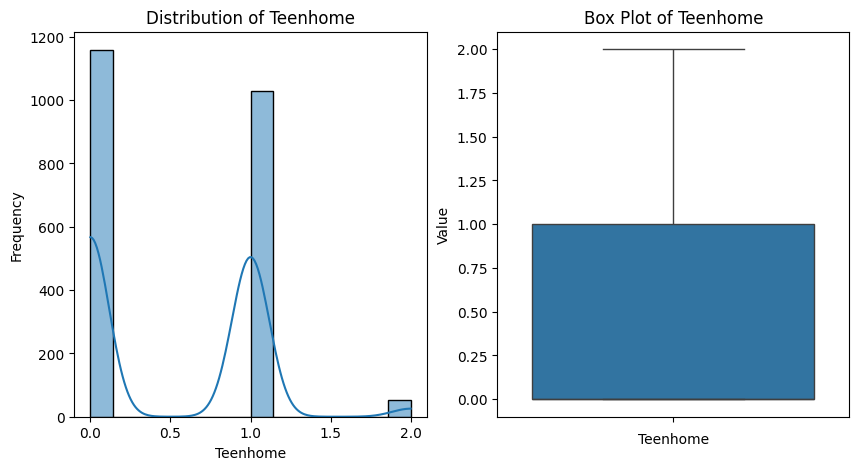

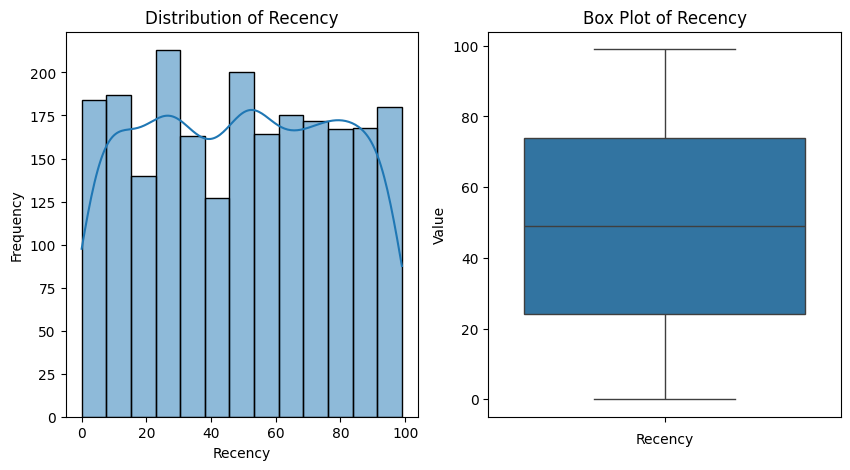

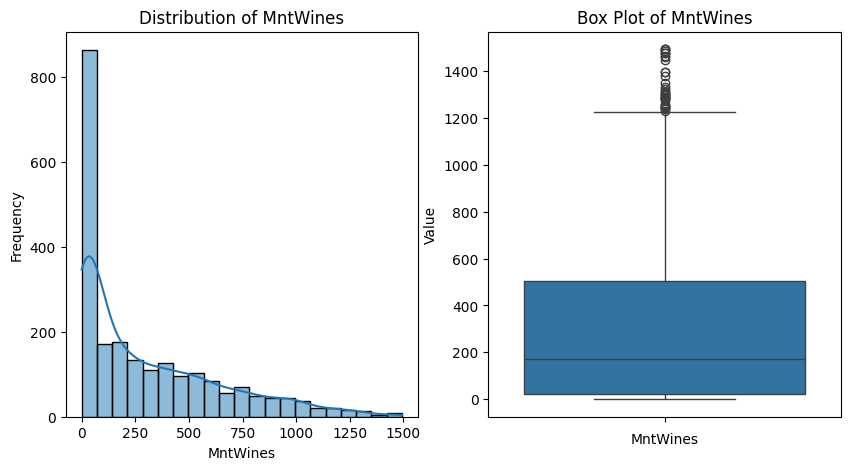

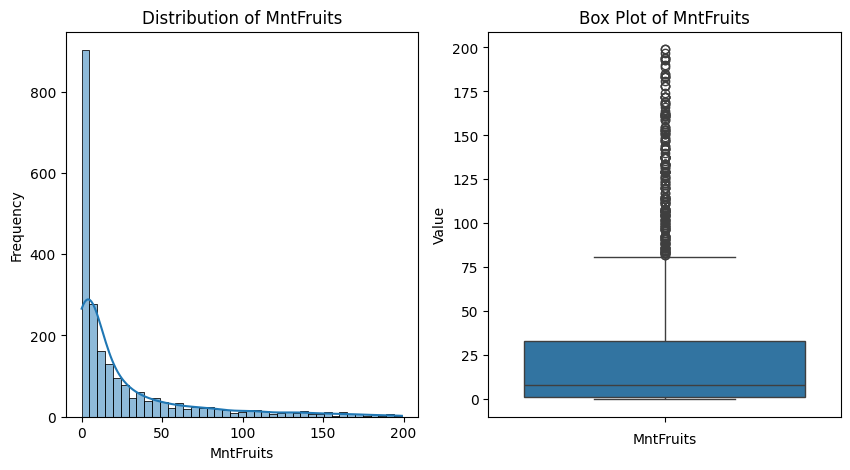

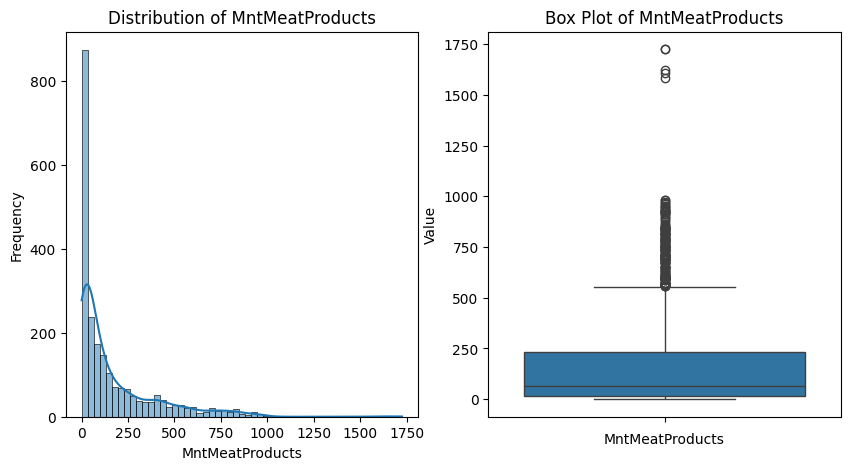

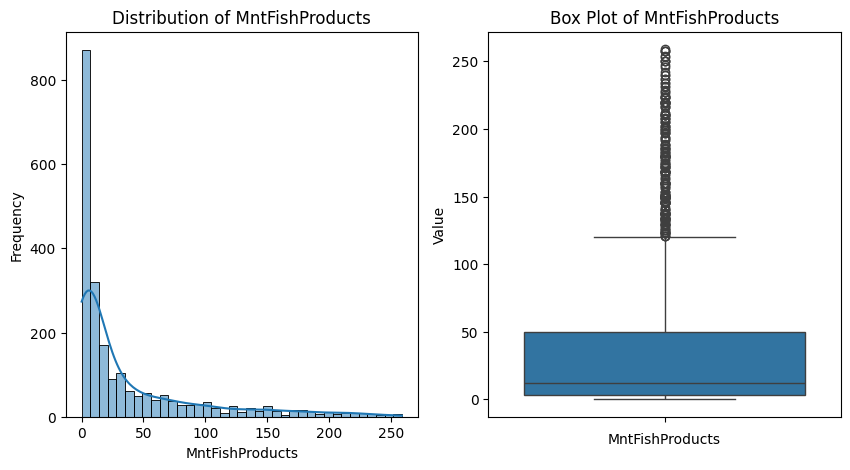

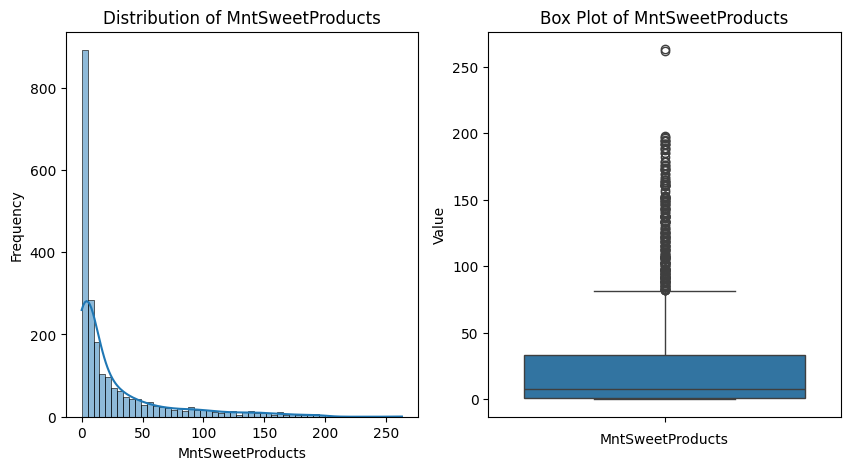

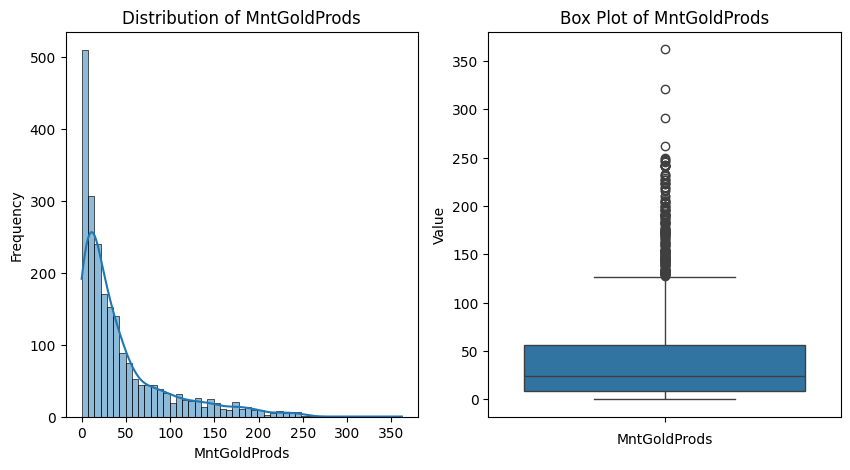

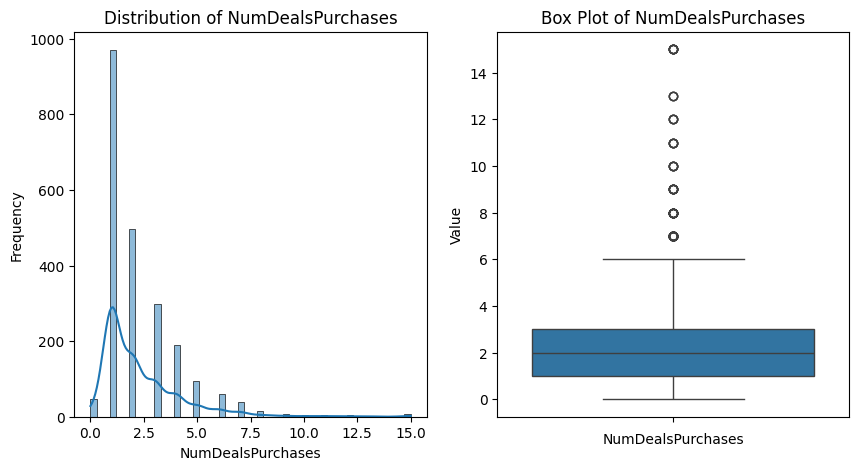

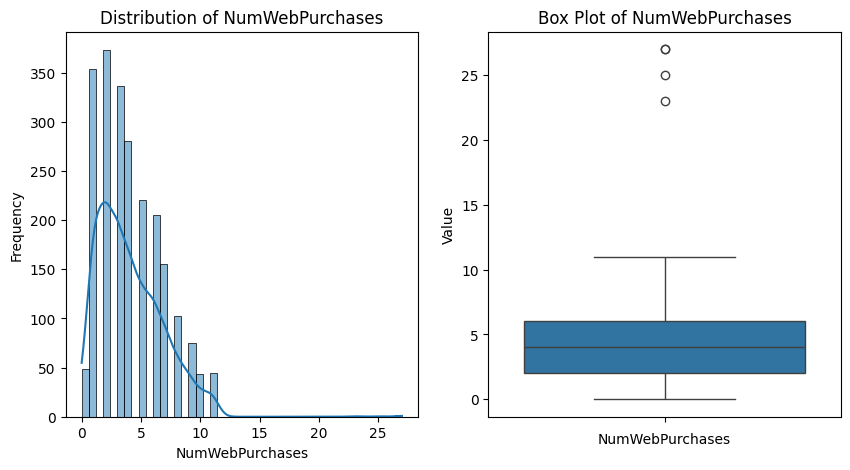

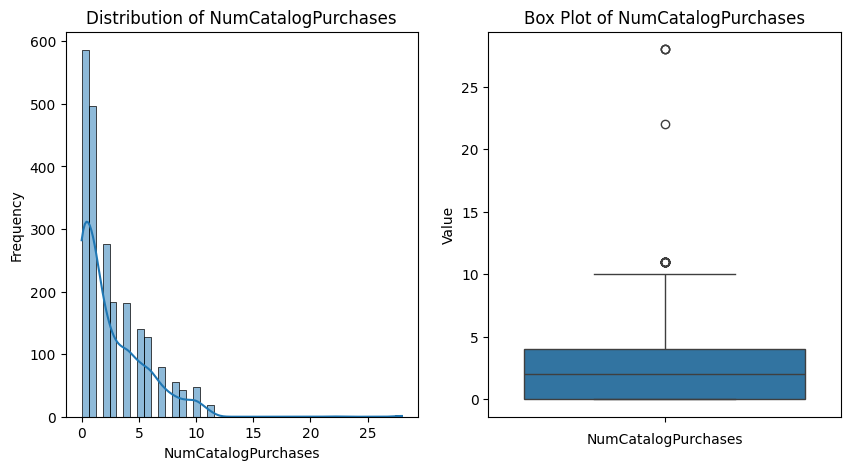

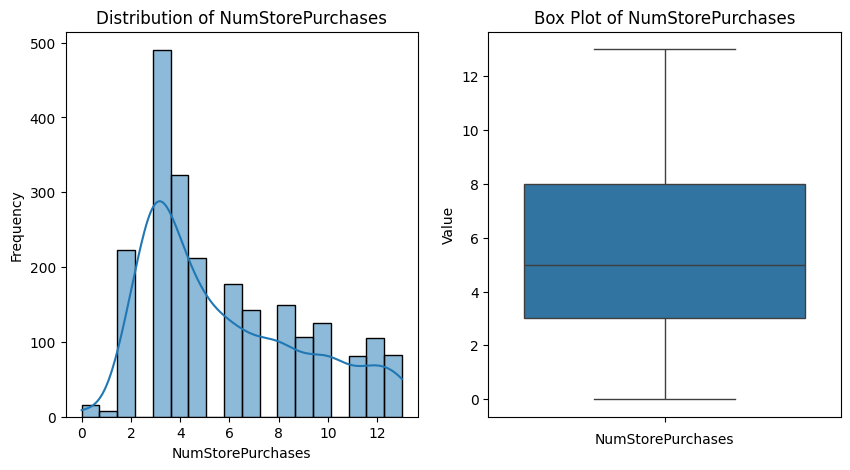

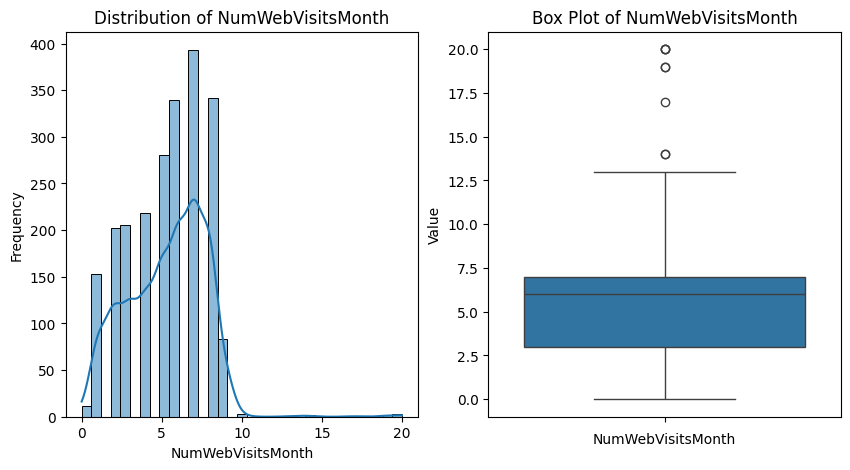

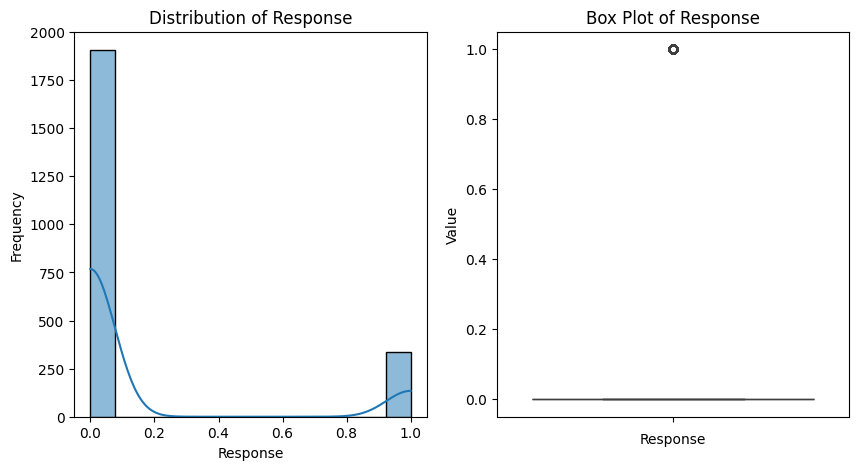

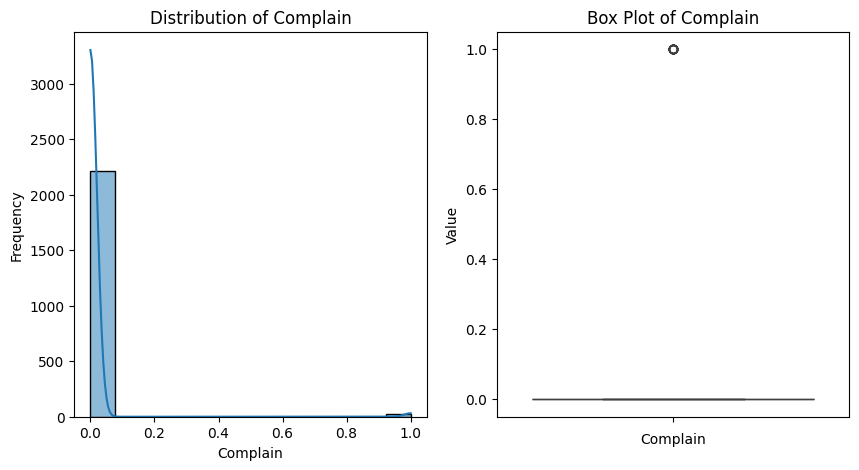

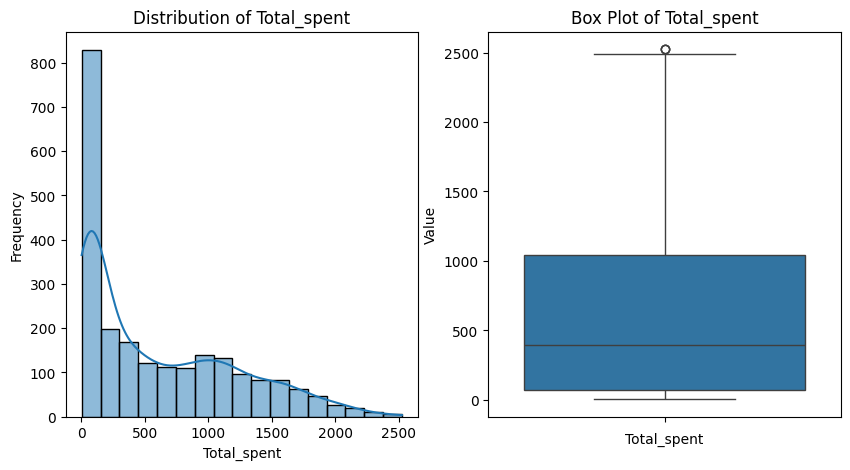

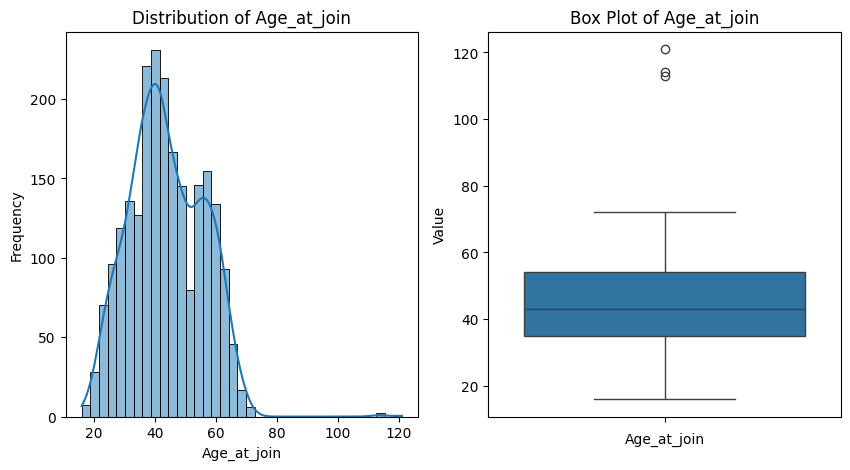

In [69]:
# Plot distribution and box plots for each numerical column

for col in numerical_columns:
    # Plot distribution using histogram
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

    # Plot box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(df[col])
    plt.title(f"Box Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Value")
    plt.show()


**Deliverables**:

- **Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.**:

  

## Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



**Deliverables**:

- **Determination of suitable probability distributions for relevant variables and corresponding calculated probabilities and expected values.**:

  

## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

**Deliverables**:

- **Key insights regarding relationships between variables and distinct customer segments based on behaviors.**

  

## Task 5: Conclusion and Recommendations

- **Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.**

**Deliverables**:

- **Well-designed visualizations that visually represent your insights and actionable recommendations based on customer behavior analysis.**

## Bonus Task - Geogebra Experiment



Here's the link to an intriguing GeoGebra experiment: [GeoGebra Experiment Link](https://www.geogebra.org/m/LZbwMZtJ)

This experiment lets you simulate coin flips as per your preferences and specifications!

Your task involves recording a video where you'll explain the concept of the **Law of Large Numbers** using this experiment. Dive further into the experience by adjusting the number of coins and exploring varying coin biases. 🪙📹🔍